# Clustering using Latent Features

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import sklearn

In [3]:
# Some name constants
FEATS_FOLDER_NAME = 'features'
PROBS_FILE_NAME = 'incv1_probs.csv'
FEATS_FILE_NAME = 'incv1_feats.csv'
HIST_FILE_NAME = 'color_hist.csv'

In [4]:
# Some path constants
ROOT_DIR = os.path.join('.', '..')
FEATS_FOLDER_PATH = os.path.join(ROOT_DIR, FEATS_FOLDER_NAME)
PROBS_FILE_PATH = os.path.join(FEATS_FOLDER_PATH, PROBS_FILE_NAME)
FEATS_FILE_PATH = os.path.join(FEATS_FOLDER_PATH, FEATS_FILE_NAME)
HIST_FILE_PATH = os.path.join(FEATS_FOLDER_PATH, HIST_FILE_NAME)

## Loading Data

In [5]:
data = pd.read_csv(FEATS_FILE_PATH)

In [6]:
data.dtypes

Unnamed: 0     object
0             float64
1             float64
2             float64
3             float64
               ...   
1019          float64
1020          float64
1021          float64
1022          float64
1023          float64
Length: 1025, dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Columns: 1025 entries, Unnamed: 0 to 1023
dtypes: float64(1024), object(1)
memory usage: 1.5+ MB


We have 1001 float64 dimensions, which are the ones that represent the estimated class probabilities of the images. We also have an objetc column, which tells us the original name of the image used.

In [8]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.418845,0.715326,0.344959,0.868278,0.309152,0.217539,0.365620,0.344307,0.540968,0.240341,...,0.219002,0.276585,0.224621,0.600590,0.318695,0.216940,0.481708,0.264499,0.274630,0.218679
std,0.295458,0.612034,0.311701,0.650307,0.360809,0.209657,0.290999,0.305765,0.401854,0.206846,...,0.313254,0.348524,0.336569,0.413506,0.289153,0.308863,0.423482,0.345269,0.476386,0.326506
min,0.005977,0.000000,0.010220,0.013509,0.000000,0.000000,0.000000,0.007909,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194130,0.197678,0.151356,0.234020,0.084506,0.080096,0.135503,0.143439,0.153746,0.079648,...,0.013440,0.011600,0.009660,0.275260,0.109139,0.001045,0.163038,0.011888,0.005103,0.003065
50%,0.384489,0.606725,0.250948,0.707483,0.206809,0.173117,0.317415,0.256438,0.536560,0.196058,...,0.088237,0.098673,0.083868,0.586087,0.254608,0.062543,0.412263,0.128080,0.072017,0.064825
75%,0.584432,1.039808,0.442879,1.516500,0.365516,0.285182,0.524431,0.460332,0.891525,0.335948,...,0.307399,0.461085,0.292488,0.833219,0.431805,0.316999,0.637754,0.387518,0.300584,0.298039
max,1.638179,3.007115,1.640325,2.356589,2.056136,1.702834,1.364115,1.760351,1.684949,1.574675,...,1.730410,1.777823,1.901270,2.056524,1.457105,1.338207,2.433587,1.829519,2.933968,1.862777


In [9]:
data.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1222__pool_table__0.9999995.jpg,0.882798,0.896023,0.123852,0.257982,0.036050,0.108023,0.633841,0.457301,1.684949,...,0.422634,0.346122,0.111589,1.441579,0.198722,0.246648,0.295942,0.560950,0.058328,0.117393
1,1328__coil__0.99999607.jpg,0.483815,0.134309,0.021849,0.367267,0.089250,0.007518,0.069921,0.219347,0.089260,...,0.049852,0.004140,0.199223,0.718976,0.000000,0.000000,0.000000,0.159411,0.012007,0.001601
2,134__zebra__0.9999949.jpg,0.291067,0.375913,0.217742,1.269691,0.384181,0.076470,0.662070,0.662391,0.827774,...,0.018289,0.000000,0.000775,0.903884,0.589769,0.016957,0.418493,0.005350,0.004198,0.185460
3,2377471__pizza__0.9999988.jpg,0.114514,1.310328,0.640905,0.427097,1.484206,0.264360,0.676649,0.033744,0.000000,...,0.004348,0.575388,0.382957,0.409826,0.274565,0.000000,0.177152,0.839289,0.492563,0.749545
4,2377620__zebra__0.9999882.jpg,0.488660,2.354030,0.333859,1.751530,0.247992,0.051798,0.212347,0.059860,0.931335,...,0.091027,0.001856,0.014082,1.149439,0.234785,0.002259,0.493726,0.000000,0.000140,0.000000


Although the last table does not show it, we know the range of posible values or our attributes is [0.0,1.0] because we are dealing with probabilities.

## Preprocessing the Data

In [10]:
data.values[:, 1:].shape

(198, 1024)

In [11]:
X = data.values[:,1:].copy()

In [12]:
X.shape

(198, 1024)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.shape

(198, 1024)

## KMeans Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
def fit_kmeans(data, no_clusters):
    inertias = []
    scores = []
    for k in no_clusters:
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        km.fit(data)
        inertias.append(km.inertia_)
        score = silhouette_score(data, km.labels_)
        scores.append(score)
    return inertias, scores

In [17]:
def plot_metrics(data, titles, xrange, xstep, figsize):
    ylabels = ['Inertias', 'Sil. Scores']
    fig, ax = plt.subplots(nrows=1, ncols=len(data), figsize=figsize)
    for i in range(len(data)):
        ax[i].plot(range(xrange[0], xrange[1]+xstep, xstep), data[i], '.b-')
        ax[i].xaxis.set_major_locator(plt.MultipleLocator(xstep))
        ax[i].set_xlabel('Number of clusters')
        ax[i].set_ylabel(ylabels[i])
        ax[i].set_title(titles[i])
    plt.tight_layout()
    plt.show()
    return fig

### Scaled Data

In [18]:
std_inertias, std_scores = fit_kmeans(X_scaled, range(2, 52, 2))

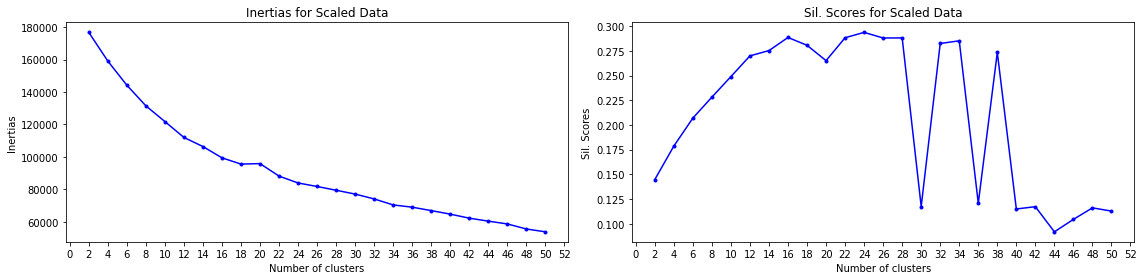

In [19]:
fig = plot_metrics((std_inertias, std_scores),
            ('Inertias for Scaled Data', 'Sil. Scores for Scaled Data'),
            (2, 50), 2, (16, 4))

### Unscaled Data

In [20]:
inertias, scores = fit_kmeans(X, range(2, 52, 2))

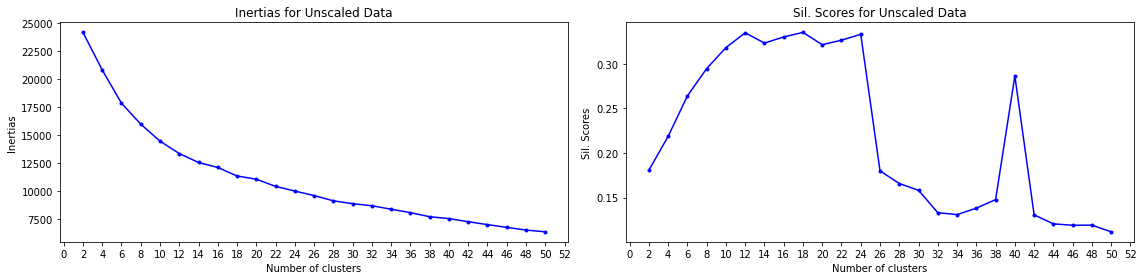

In [21]:
fig = plot_metrics((inertias, scores),
            ('Inertias for Unscaled Data', 'Sil. Scores for Unscaled Data'),
            (2, 50), 2, (16, 4))

No good values for k had been found using KMeans. It could be agued that the low score is due to nosnpherical clusters present in the latent space.

## DBSCAN Clustering

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [23]:
def fit_dbscan(data, min_samples, eps_values, min_no_clusters=2, max_no_clusters=np.inf, min_clust_instances=20, max_clust_instances=np.inf):
    scores = []
    clusters = []
    instances = []
    
    for m in min_samples:
        row_scores = []
        row_clusters = []
        row_instances = []
        for e in eps_values:
            db = DBSCAN(min_samples=m, eps=e)
            db.fit(data)
            # Get only non anomalous instances
            non_a = db.labels_ != -1 # [False, ..., False] if all are outliers
            # TODO: If at least one is True, keep going
            # Calculate conditions
            n_clusters = len(np.unique(db.labels_[non_a])) # 0 if all are outliers
            n_instances = len(db.labels_[non_a]) # 0 if all are outliers
            # Apply conditions
            if (n_clusters >= min_no_clusters and n_clusters <= max_no_clusters and n_instances >= min_clust_instances and n_instances <= max_clust_instances):
                score = silhouette_score(data[non_a], db.labels_[non_a])
            else:
                score = None
            # Store results
            row_scores.append(score)
            row_clusters.append(n_clusters)
            row_instances.append(n_instances)
        # Store row results
        scores.append(row_scores)
        clusters.append(row_clusters)
        instances.append(row_instances)
    # Prepare and return values
    ms_axis = pd.Index(min_samples, name='Min_samples')
    eps_axis = pd.Index(eps_values, name='Epsilon')
    df_scores = pd.DataFrame(scores, index=ms_axis, columns=eps_axis)
    df_clusters = pd.DataFrame(clusters, index=ms_axis, columns=eps_axis)
    df_instances = pd.DataFrame(instances, index=ms_axis, columns=eps_axis)
    return df_scores, df_clusters, df_instances

In [29]:
dfs, dfc, dfi = fit_dbscan(X, range(2, 22, 2), np.arange(5, 105, 5), min_clust_instances=140)
dfs

Epsilon,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
Min_samples,,,,,,,,,,,,,,,,,,,,
2,None,None,0.221652,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,0.255033,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,None,None,0.257415,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8,None,None,0.261139,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
12,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
14,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
16,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
18,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [30]:
dfs, dfc, dfi = fit_dbscan(X, range(2, 22, 2), np.arange(6, 20, 2), min_no_clusters=2, min_clust_instances=140)
dfs

Epsilon,6,8,10,12,14,16,18
Min_samples,,,,,,,
2,None,None,None,0.402843,0.266275,0.169493,0.23781
4,None,None,None,0.440103,0.272411,NaN,NaN
6,None,None,None,NaN,0.277936,NaN,NaN
8,None,None,None,NaN,0.272779,NaN,NaN
10,None,None,None,NaN,NaN,NaN,NaN
12,None,None,None,NaN,NaN,NaN,NaN
14,None,None,None,NaN,NaN,NaN,NaN
16,None,None,None,NaN,NaN,NaN,NaN
18,None,None,None,NaN,NaN,NaN,NaN


In [31]:
dfs, dfc, dfi = fit_dbscan(X, range(2, 10, 1), np.arange(6, 16, 1), min_clust_instances=140)
dfs

Epsilon,6,7,8,9,10,11,12,13,14,15
Min_samples,,,,,,,,,,
2,None,None,None,None,None,0.442674,0.402843,0.322418,0.266275,0.221652
3,None,None,None,None,None,NaN,0.412054,0.330544,0.260876,0.255033
4,None,None,None,None,None,NaN,0.440103,0.370082,0.272411,0.255033
5,None,None,None,None,None,NaN,NaN,0.372159,0.272411,0.257415
6,None,None,None,None,None,NaN,NaN,NaN,0.277936,0.257415
7,None,None,None,None,None,NaN,NaN,NaN,0.272779,0.266552
8,None,None,None,None,None,NaN,NaN,NaN,0.272779,0.261139
9,None,None,None,None,None,NaN,NaN,NaN,NaN,0.261139


In [39]:
dfs, dfc, dfi = fit_dbscan(X, range(2, 6, 1), np.arange(10.4, 12.8, 0.2), min_clust_instances=140)
dfs

Epsilon,10.4,10.6,10.8,11.0,11.2,11.4,11.6,11.8,12.0,12.2,12.4,12.6,12.8
Min_samples,,,,,,,,,,,,,
2,0.435481,0.449814,0.442674,0.442674,0.438851,0.419033,0.407524,0.400256,0.402843,0.401138,0.395894,0.378097,0.378097
3,NaN,NaN,NaN,NaN,0.453589,0.450081,0.437419,0.430747,0.412054,0.410212,0.404650,0.386335,0.386335
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.463648,0.440103,0.436754,0.430480,0.413495,0.413495
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.453036,0.447789,0.414062,0.414062


In [43]:
dfs, dfc, dfi = fit_dbscan(X, range(2, 5, 1), np.arange(10.5, 12.7, 0.2), min_clust_instances=140)
dfs

Epsilon,10.5,10.7,10.9,11.1,11.3,11.5,11.7,11.9,12.1,12.3,12.5
Min_samples,,,,,,,,,,,
2,0.435481,0.447746,0.442674,0.442674,0.437065,0.410853,0.405278,0.397248,0.402843,0.400318,0.378097
3,NaN,NaN,NaN,NaN,0.451926,0.441498,0.435609,0.422744,0.412054,0.409329,0.386335
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.461506,0.439247,0.435706,0.413495


The better parameters for DBSCAN clustering seem to be min_samples=4 and epsilon_distance=11.8, giving a silhouette score of 46.36% (for a random instance, the expected distance to its cluster centroid represents 46% of the distance to the nearest cluster centroid). This set of parameters grops 140 instances into 9 clusters, with an average of 15.5 instances per cluster.

In [44]:
dfs, dfc, dfi = fit_dbscan(X, [4], [11.8], min_clust_instances=150)
dfi/dfc

Epsilon,11.8
Min_samples,
4,15.555556


In [45]:
dfi

Epsilon,11.8
Min_samples,
4,140


In [46]:
dfc

Epsilon,11.8
Min_samples,
4,9
